In [5]:
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import math

plt.style.use('seaborn')

In [6]:
labels = {0: 'GOOG', 1: 'SNAP', 2: 'SQ', 3: 'AAPL', 4: 'FB', 5: 'BABA', 6: 'CRM', 7: 'EBAY', 8: 'OTEX', 9: 'VMW'}#, 9: 'OPEN'}#, 10: 'OPEN'}
labels_list = list(labels.values())

ticker_tuples = ' '.join(labels_list)

tickers = yf.Tickers(ticker_tuples)

tickers_ls = list(tickers.tickers)

In [7]:
relative_days = 720
x_days_ago = date.today() - relativedelta(days = relative_days)

def build_dataframes(ls, price_type):
    ticker_history = pd.DataFrame()
    compared_prices = pd.DataFrame()
    pe_ratio = pd.DataFrame()
    for l, t in enumerate(ls):
        if l == 0:
            ticker_history = pd.DataFrame(tickers.tickers[tickers_ls[l]].history(start = x_days_ago)['Close']).rename(columns = {'Close': t})
            compared_prices = pd.DataFrame({'ticker': t, 'two_hundred_day_average': [tickers.tickers[tickers_ls[l]].info['twoHundredDayAverage']]
                                            , 'previous_close': [tickers.tickers[tickers_ls[l]].info['previousClose']]
                                            , 'fifty_day_average': [tickers.tickers[tickers_ls[l]].info['fiftyDayAverage']]}
                                            , columns = ['two_hundred_day_average', 'previous_close', 'fifty_day_average'])
        if l > 0:
            ticker_history = ticker_history.merge(pd.DataFrame(tickers.tickers[tickers_ls[l]].history(start = x_days_ago)['Close']).rename(columns = {'Close': t})
                                    , how='inner'
                                    , left_index=True
                                    , right_index=True)
            compared_prices = compared_prices.append(pd.DataFrame({'ticker': t, 'two_hundred_day_average': [tickers.tickers[tickers_ls[l]].info['twoHundredDayAverage']]
                                            , 'previous_close': [tickers.tickers[tickers_ls[l]].info['previousClose']]
                                            , 'fifty_day_average': [tickers.tickers[tickers_ls[l]].info['fiftyDayAverage']]}
                                            , columns = ['two_hundred_day_average', 'previous_close', 'fifty_day_average']))
    if price_type == 'compare':
        return compared_prices
    if price_type == 'history':
        return ticker_history
    

In [8]:
trended_prices = build_dataframes(labels_list, 'history')

trended_prices

,GOOG,SNAP,SQ,AAPL,FB,BABA,CRM,EBAY,OTEX,VMW
Date,,,,,,,,,,
2019-09-23,1234.030029,17.120001,56.759998,53.877392,186.820007,176.979996,154.649994,39.270786,39.709618,152.050003
2019-09-24,1218.760010,17.040001,57.500000,53.621204,181.279999,171.550003,152.050003,38.607159,39.303333,146.149994
2019-09-25,1246.520020,17.110001,58.509998,54.446419,182.800003,176.660004,152.990005,38.294868,39.593536,149.059998
2019-09-26,1241.390015,17.000000,60.799999,54.165604,180.110001,175.000000,152.339996,37.982578,39.545174,147.360001
2019-09-27,1225.089966,16.020000,60.750000,53.902031,177.100006,165.979996,148.259995,37.445820,39.216274,145.880005
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,2909.239990,76.110001,268.070007,151.830002,379.380005,166.990005,265.269989,76.739998,54.830002,148.869995
2021-09-01,2916.840088,74.169998,268.250000,152.509995,382.049988,173.279999,268.320007,76.150002,54.980000,146.860001
2021-09-02,2884.379883,73.919998,265.940002,153.649994,375.279999,172.000000,264.149994,76.489998,54.939999,146.169998


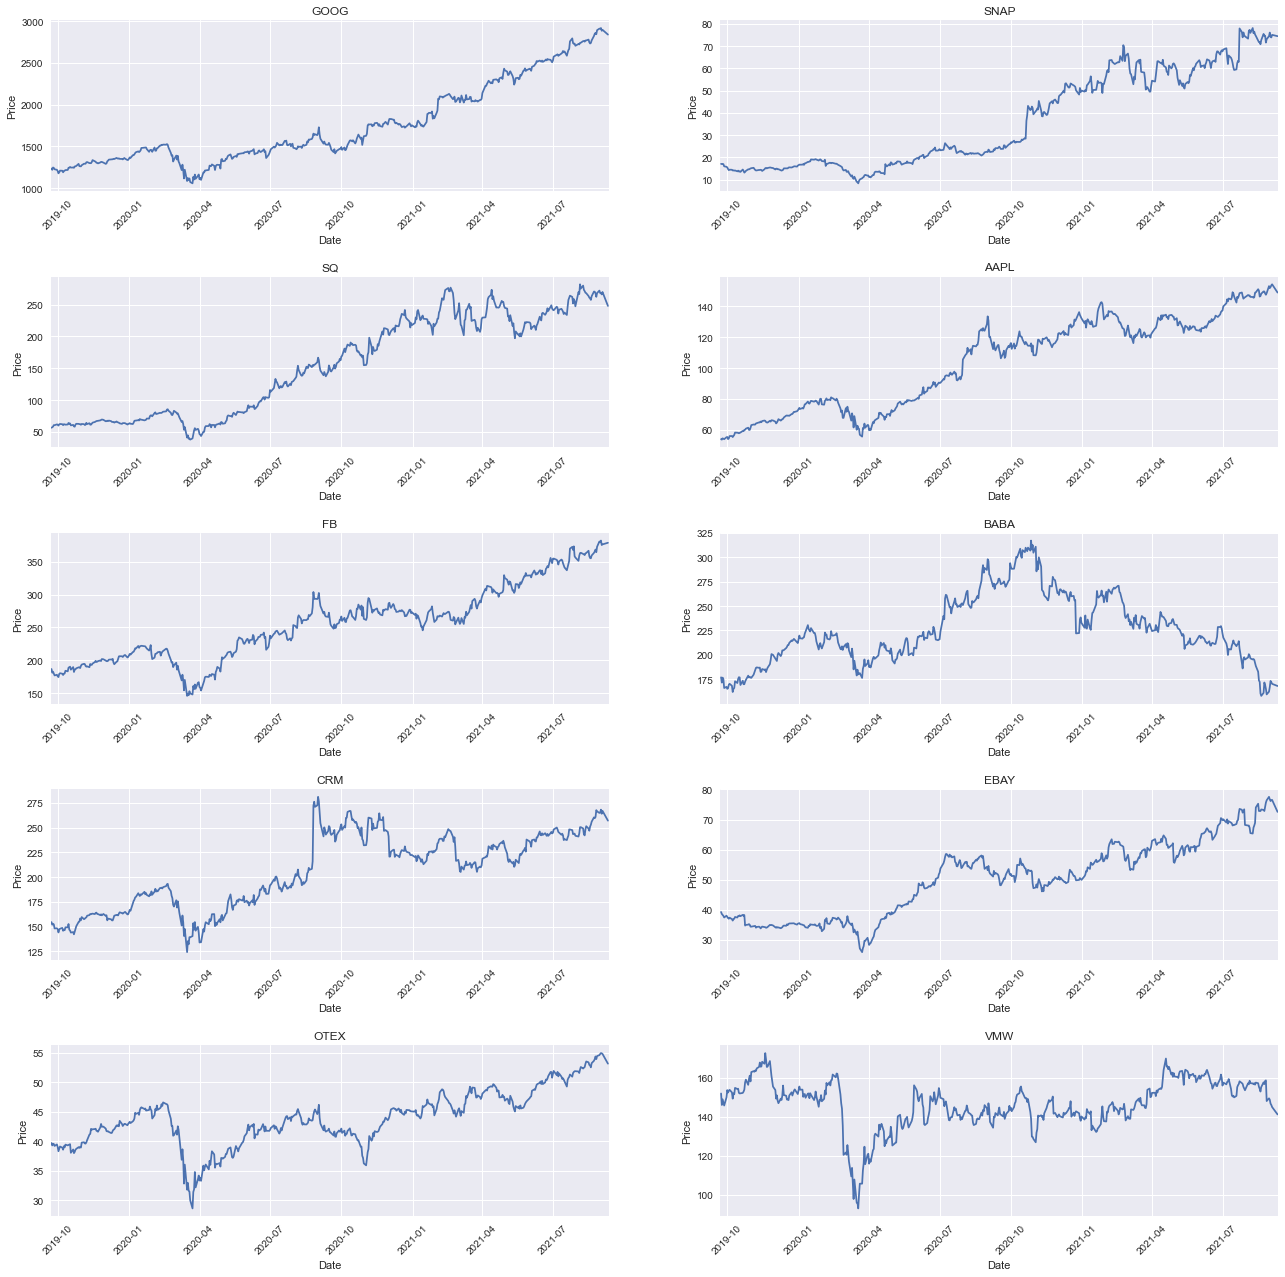

In [9]:
from matplotlib.pyplot import figure

trended_prices = build_dataframes(labels_list, 'history')

fig = plt.subplots(figsize=(25, 25))

for i, j in enumerate(labels_list):
    ax = plt.subplot(math.ceil(len(labels_list)/2), 2, i+1)
    ax
    ax.set_xlim([x_days_ago, date.today()])
    plt.subplots_adjust(hspace = 0.5)
    x = trended_prices.index
    y = trended_prices[j]
    plt.plot(x, y)
    plt.xticks(rotation=45)
    plt.title(j)
    plt.xlabel('Date')
    plt.ylabel('Price')
    
fig = plt.gcf()
fig.set_size_inches(22, 22)

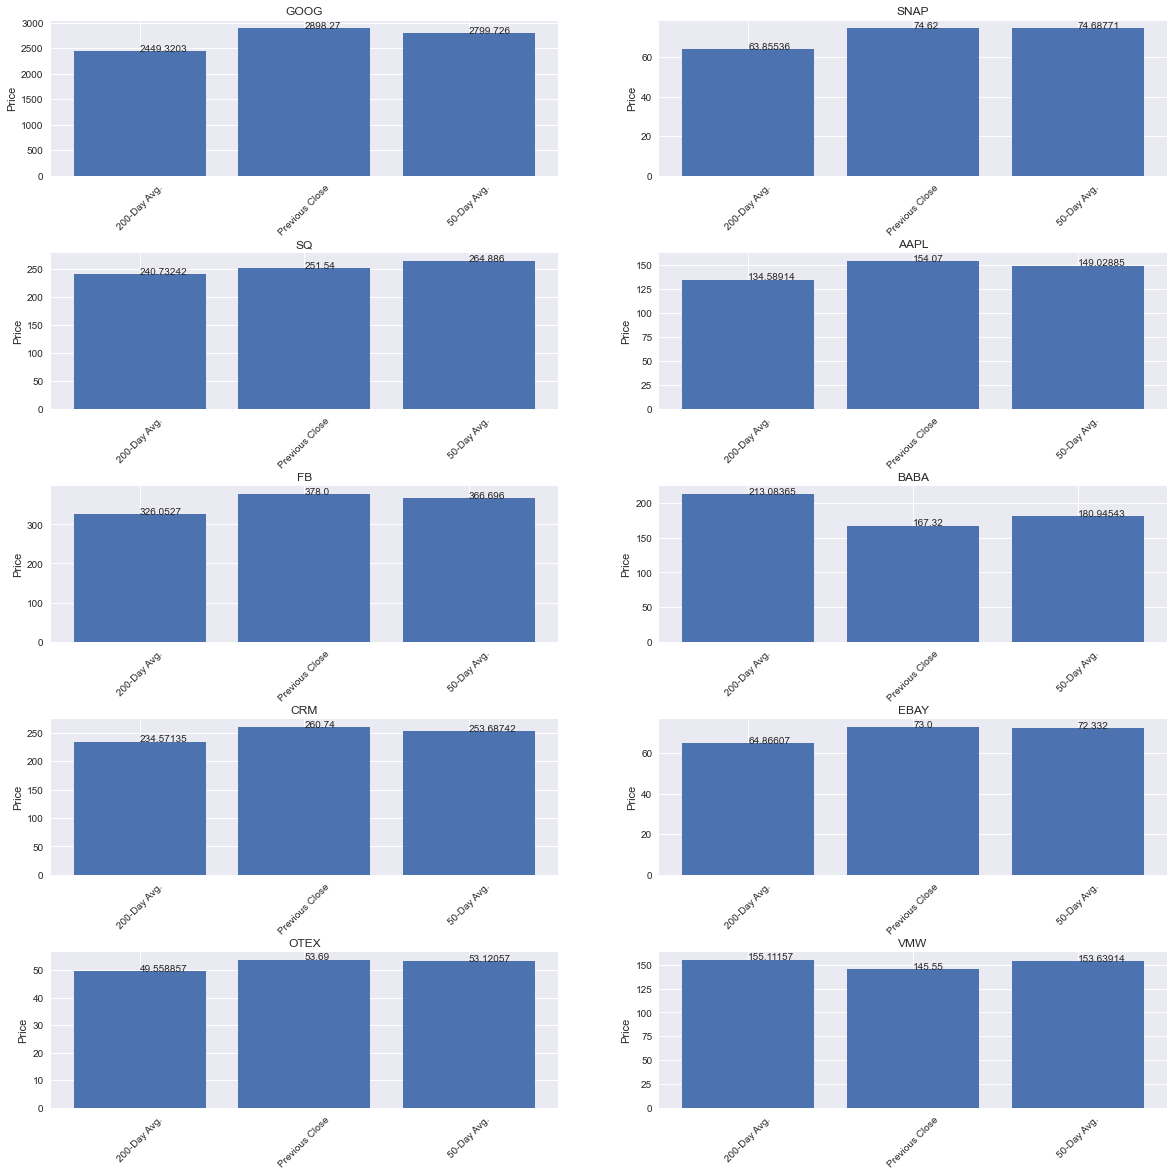

In [10]:
compare_prices = build_dataframes(labels_list, 'compare').reset_index()[['two_hundred_day_average', 'previous_close', 'fifty_day_average']]

fig = plt.subplots(figsize=(20, 20))

for i, j in enumerate(labels_list):
    ax = plt.subplot(math.ceil(len(labels_list)/2), 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    z = ['200-Day Avg.', 'Previous Close', '50-Day Avg.']
    v = [compare_prices.loc[i, 'two_hundred_day_average'], compare_prices.loc[i, 'previous_close'], compare_prices.loc[i, 'fifty_day_average']]
    plt.bar(z, v)
    plt.xticks(rotation=45)
    plt.title(j)
    plt.ylabel('Price')
    for i,j in zip(z,v):
        ax.annotate(str(j),xy=(i,j))